In [2]:
# General toolkits
import numpy as np
import pandas as pd
import geopandas

# Visualizers
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import axes3d

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [44]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/fisher.csv'
iris = pd.read_csv(url)
iris_groups = iris.groupby('species')
print(iris.columns.values)
iris.head()

['species' 'petal_width' 'petal_length' 'sepal_width' 'sepal_length']


,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,2,14,33,50
1,setosa,2,10,36,46
2,setosa,2,16,31,48
3,setosa,1,14,36,49
4,setosa,2,13,32,44


You can use scatterplots to help you see where the groups are.  There are some automated tools for this (see scatterplot matrices) but in this case, let's manually change the x and y variables to investigate which combination of variables best separates the groups.

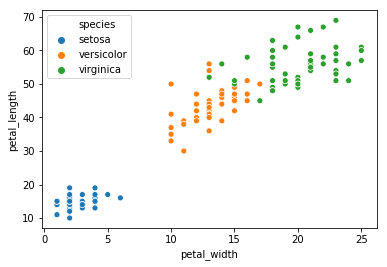

In [120]:
seaborn.scatterplot(data=iris,x='petal_width',y='petal_length',hue='species')

Of course scatterplots don't need to be in two dimensions.  We can use different symbols (e.g., exes and ohs) or hue to visualize different categories.  We could use dot size (e.g., bubble plots) to indicate a third quantitative variable.

Alternatively, we could construct a 3D plot to visualize a third quantitative variable (and then use size to visualize a fourth, if we wanted!).

<IPython.core.display.Javascript object>


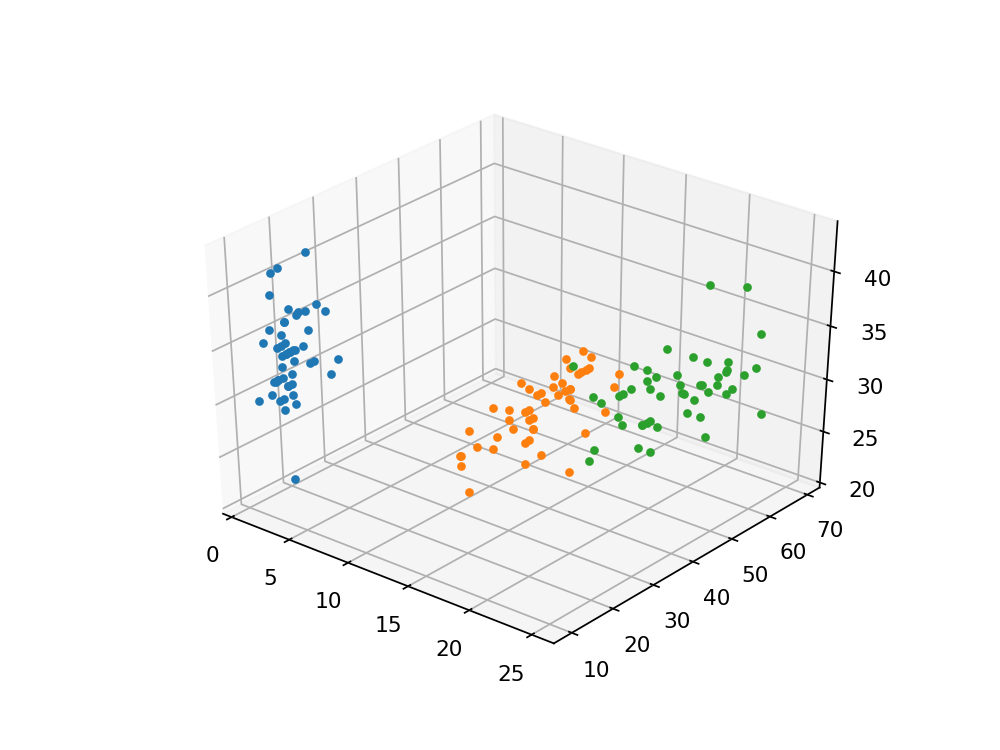

In [4]:
# We'll use the notebook plotting mechanism to do this one, since it's interactive.
# Note: This won't work if you've already run a %matplotlib inline (as below)
# See https://stackoverflow.com/questions/41125690/matplotlib-notebook-showing-a-blank-histogram

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for name, group in iris_groups:
    ax.plot3D(group['petal_width'],group['petal_length'],group['sepal_width'],'.')

# Linear Discriminant Analysis

[[ 2.46 14.62]
 [13.26 43.22]
 [20.06 55.52]]


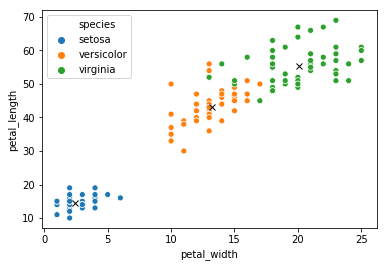

In [23]:
# Create a LDA object
lda = LinearDiscriminantAnalysis()

# Fit the data
X = iris.loc[:,['petal_width','petal_length']]
y = iris['species']
lda_result = lda.fit(X, y)

# The predicted labels/categories can be recovered like so:
predictions = lda.predict(X)

#See the results
print(lda_result.means_)

%matplotlib inline
_ = seaborn.scatterplot(data=iris,x='petal_width',y='petal_length',hue='species')
_ = plt.plot(lda_result.means_[:,0],lda_result.means_[:,1],'kx')

# Classification accuracy assessment

In [12]:
# Many tools are available in scikit learn to assess accuracy
c_matrix = confusion_matrix(iris.species,predictions)
print(c_matrix)

class_report = classification_report(iris.species,predictions,labels=np.unique(iris.species))
print(class_report)

kappa = cohen_kappa_score(iris.species,predictions)
print('Cohens Kappa:',kappa)

[[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.96      0.93        50
    virginia       0.96      0.90      0.93        50

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Cohens Kappa: 0.9299999999999999


In [17]:
# Would using more columns have improved our classification?

# Fit the data
X = iris.iloc[:,1:]
print(X.head())
y = iris['species']
lda_result = lda.fit(X, y)

# The predicted labels/categories can be recovered like so:
predictions = lda.predict(X)

c_matrix = confusion_matrix(iris.species,predictions)
print(c_matrix)

class_report = classification_report(iris.species,predictions,labels=np.unique(iris.species))
print(class_report)

kappa = cohen_kappa_score(iris.species,predictions)
print('Cohens Kappa:',kappa)

   petal_width  petal_length  sepal_width  sepal_length
0            2            14           33            50
1            2            10           36            46
2            2            16           31            48
3            1            14           36            49
4            2            13           32            44
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.96      0.96        50
    virginia       0.96      0.96      0.96        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Cohens Kappa: 0.96


# k-means clustering

[[ 2.46 14.62]
 [19.88 55.92]
 [13.44 42.82]]


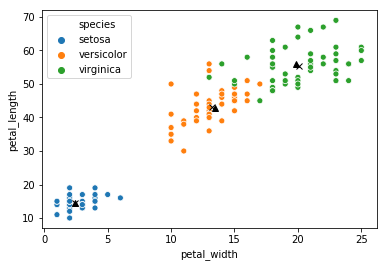

In [45]:
X = iris.loc[:,['petal_width','petal_length']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

print(kmeans.cluster_centers_)

_ = seaborn.scatterplot(data=iris,x='petal_width',y='petal_length',hue='species')
_ = plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k^')
_ = plt.plot(lda_result.means_[:,0],lda_result.means_[:,1],'kx')

In [47]:
# We can inspect the labels created, but these don't have names (k-means didn't know them)
print(kmeans.labels_)

# So we'll have to do a recode to compare using pandas and a dictionary showing how to transform our data
predictions = pd.Series(kmeans.labels_).replace({0:'setosa',1:'virginica',2:'versicolor'})
predictions.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object

In [48]:
# Now we can run the accuracy numbers:

c_matrix = confusion_matrix(iris.species,predictions)
print(c_matrix)

class_report = classification_report(iris.species,predictions)
print(class_report)

kappa = cohen_kappa_score(iris.species,predictions)
print('Cohens Kappa:',kappa)

[[50  0  0]
 [ 0 46  4]
 [ 0  4 46]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.92      0.92        50
   virginica       0.92      0.92      0.92        50

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Cohens Kappa: 0.92


# Principal Component Analysis

In [93]:
# We'll use all four variables:
X = iris.iloc[:,1:]
print(X.columns.values)

# Play with n_components here to see how the explained variance for each factor increases or decreases
pca = PCA(n_components=2)
pca.fit(X)
print('Components:\n',pca.components_)
print('Explained variance:',pca.explained_variance_ratio_)

['petal_width' 'petal_length' 'sepal_width' 'sepal_length']
Components:
 [[ 0.35269671  0.85973502 -0.08580835  0.35930162]
 [-0.06783287 -0.17434916  0.72943474  0.65797115]]
Explained variance: [0.92372665 0.05334755]


['petal_width' 'petal_length' 'sepal_width' 'sepal_length']
Components:
 [[ 0.35269671  0.85973502 -0.08580835  0.35930162]
 [-0.06783287 -0.17434916  0.72943474  0.65797115]]
Explained variance: [0.92372665 0.05334755]


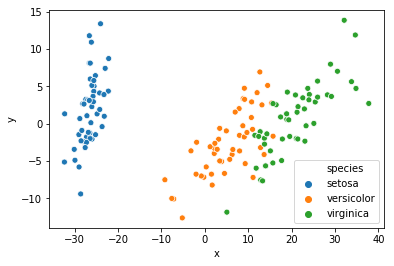

In [89]:
# We'll use all four variables:
X = iris.iloc[:,1:]
print(X.columns.values)

pca = PCA(n_components=2)
pca.fit(X)
print('Components:\n',pca.components_)
print('Explained variance:',pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['species'] = iris['species']

projected_data = pca.transform(X)
pca_df['x'] = projected_data[:,0]
pca_df['y'] = projected_data[:,1]

_ = seaborn.scatterplot(data=pca_df,x='x',y='y',hue='species')

Components:
 [[ 0.35269671  0.85973502 -0.08580835  0.35930162]]
Explained variance: [0.96110699]


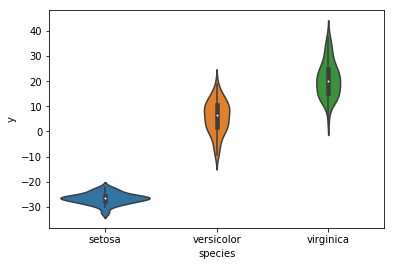

In [86]:
# For a single component, we can use a boxplot or violin plot.  If it's done a good job, the categories
# won't overlap too much

pca = PCA(n_components=1)
pca.fit(X)
print('Components:\n',pca.components_)
print('Explained variance:',pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['species'] = iris['species']

projected_data = pca.transform(X)
pca_df['y'] = projected_data[:,0]

_ = seaborn.violinplot(data=pca_df,x='species',y='y')

In [91]:
# PCA isn't a classifier, but we can use it to transform the data to a more optimal space, and then use that data to 
# classify.  It generally won't be better than the original, but it might be a lot more efficient!

X = iris.iloc[:,1:]
print(X.columns.values)

pca = PCA(n_components=2)
pca.fit(X)
print('Components:\n',pca.components_)
print('Explained variance:',pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['species'] = iris['species']

projected_data = pca.transform(X)
pca_df['x'] = projected_data[:,0]
pca_df['y'] = projected_data[:,1]

lda = LinearDiscriminantAnalysis()

# Fit the data
X = pca_df.loc[:,['x','y']]
y = pca_df['species']
lda_result = lda.fit(X, y)

# The predicted labels/categories can be recovered like so:
predictions = lda.predict(X)

c_matrix = confusion_matrix(pca_df.species,predictions)
print(c_matrix)

class_report = classification_report(pca_df.species,predictions)
print(class_report)

kappa = cohen_kappa_score(pca_df.species,predictions)
print('Cohens Kappa:',kappa)

['petal_width' 'petal_length' 'sepal_width' 'sepal_length']
Components:
 [[ 0.35269671  0.85973502 -0.08580835  0.35930162]
 [-0.06783287 -0.17434916  0.72943474  0.65797115]]
Explained variance: [0.92372665 0.05334755]
[[50  0  0]
 [ 0 45  5]
 [ 0  4 46]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.90      0.91        50
   virginica       0.90      0.92      0.91        50

   micro avg       0.94      0.94      0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150

Cohens Kappa: 0.91


# Random Forest Classifier

In [118]:
clf = RandomForestClassifier(n_estimators=1000)

X = iris.iloc[:,1:]
y = iris['species']
clf.fit(X, y)

prediction = clf.predict(X)

# Many tools are available in scikit learn to assess accuracy
c_matrix = confusion_matrix(iris.species,predictions)
print(c_matrix)

class_report = classification_report(iris.species,predictions,labels=np.unique(iris.species))
print(class_report)

kappa = cohen_kappa_score(iris.species,predictions)
print('Cohens Kappa:',kappa)

[[50  0  0]
 [ 0 45  5]
 [ 0  4 46]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.90      0.91        50
   virginica       0.90      0.92      0.91        50

   micro avg       0.94      0.94      0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150

Cohens Kappa: 0.91


# A Geographic Example

### Loading the geometries

  STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
0      39      131  01074078  0500000US39131  39131        Pike   06   
1      46      003  01266983  0500000US46003  46003      Aurora   06   
2      55      035  01581077  0500000US55035  55035  Eau Claire   06   
4      48      259  01383915  0500000US48259  48259     Kendall   06   
5      40      015  01101795  0500000US40015  40015       Caddo   06   

        ALAND    AWATER                                           geometry  
0  1140324458   9567612  (POLYGON ((-83.353531 39.197585, -82.785891000...  
1  1834813753  11201379  (POLYGON ((-98.807771 43.935223, -98.331508 43...  
2  1652211310  18848512  (POLYGON ((-91.65045499999999 44.855951, -90.9...  
4  1715747531   1496797  (POLYGON ((-98.920147 30.13829, -98.587897 30....  
5  3310745124  30820525  (POLYGON ((-98.623149 35.551597, -98.313250999...  


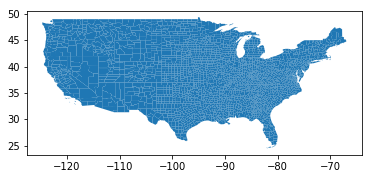

In [266]:
# "counties" is a geojson encoded version of the Cartographic Boundary Files from the census

county_url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/cb_2016_us_county_20m.geojson'
counties = geopandas.read_file(county_url)

# Remove AK, HI, and PR for simplicity of visualization
counties = counties.loc[counties['STATEFP']!='02']
counties = counties.loc[counties['STATEFP']!='15']
counties = counties.loc[counties['STATEFP']!='72']

print(counties.head())
counties.plot()

### Loading some CHR data to look at

In [136]:
chr_data = pd.read_csv('https://raw.githubusercontent.com/thomaspingel/geodata/master/chr_2016.csv',dtype={'FIPS':str})

# For our purposes, we're just going to look at a selection of columns:
# Define columns to keep:
cols = ['FIPS', 'Poor or fair health - % Fair/Poor', 'Low birthweight - % LBW', 'Adult smoking - % Smokers', 
        'Adult obesity - % Obese', 'Physical inactivity - % Physically Inactive', 
        'Excessive drinking - % Excessive Drinking', 'Alcohol-impaired driving deaths - % Alcohol-Impaired', 
        'Sexually transmitted infections - Chlamydia Rate', 'Teen births - Teen Birth Rate', 'Uninsured - % Uninsured', 
        'Primary care physicians - PCP Rate', 'High school graduation - Graduation Rate', 'Some college - % Some College', 
        'Unemployment - % Unemployed', 'Income inequality - Income Ratio', 'Violent crime - Violent Crime Rate', 
        'Infant mortality - Infant Mortality Rate', 'Median household income - Household Income', 
        'Homicides - Homicide Rate', 'Demographics - Population', 'Demographics - % Non-Hispanic White', 
        'Demographics - % Rural']

# Keep only these:
chr_data = chr_data[cols]

In [267]:
chr_data.head()

,FIPS,Poor or fair health - % Fair/Poor,Low birthweight - % LBW,Adult smoking - % Smokers,Adult obesity - % Obese,Physical inactivity - % Physically Inactive,Excessive drinking - % Excessive Drinking,Alcohol-impaired driving deaths - % Alcohol-Impaired,Sexually transmitted infections - Chlamydia Rate,Teen births - Teen Birth Rate,...,Some college - % Some College,Unemployment - % Unemployed,Income inequality - Income Ratio,Violent crime - Violent Crime Rate,Infant mortality - Infant Mortality Rate,Median household income - Household Income,Homicides - Homicide Rate,Demographics - Population,Demographics - % Non-Hispanic White,Demographics - % Rural
0,01001,19.4,8.786701,18.7,30.9,28.7,15.1,31.818182,416.111251,35.183521,...,56.470750,5.883047,4.303481,253.644617,7.054297,54366.0,5.1,55395.0,75.597076,42.002162
1,01003,16.0,8.507297,18.6,26.7,25.2,15.1,39.436620,308.192253,41.620561,...,62.335918,6.053720,4.494800,220.665106,5.919469,49626.0,3.8,200111.0,83.000435,42.279099
2,01005,25.7,12.148280,21.4,40.8,32.9,12.4,39.130435,632.329694,67.902335,...,43.358568,10.809275,5.285567,146.888576,12.959866,34971.0,4.5,26887.0,46.583851,67.789635
3,01007,22.0,12.415730,21.0,40.1,33.2,13.8,34.375000,367.305395,48.393740,...,48.927875,7.137850,4.251361,235.952110,14.021312,39546.0,7.4,22506.0,74.522350,68.352607
4,01009,20.7,7.472798,19.4,32.4,28.5,14.1,19.230769,159.097984,45.347928,...,49.149934,6.146908,4.124186,219.034344,6.049607,45567.0,3.3,57719.0,87.756198,89.951502


### Join the data and inspect it

In [268]:
df = counties.merge(chr_data,left_on='GEOID',right_on='FIPS',how='left')

In [269]:
df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Some college - % Some College,Unemployment - % Unemployed,Income inequality - Income Ratio,Violent crime - Violent Crime Rate,Infant mortality - Infant Mortality Rate,Median household income - Household Income,Homicides - Homicide Rate,Demographics - Population,Demographics - % Non-Hispanic White,Demographics - % Rural
0,39,131,01074078,0500000US39131,39131,Pike,06,1140324458,9567612,"(POLYGON ((-83.353531 39.197585, -82.785891000...",...,40.180128,8.996937,4.959855,41.859248,10.769231,40512.0,NaN,28256.0,95.480606,74.238044
1,46,003,01266983,0500000US46003,46003,Aurora,06,1834813753,11201379,"(POLYGON ((-98.807771 43.935223, -98.331508 43...",...,63.333333,2.537129,3.471554,0.000000,NaN,50896.0,NaN,2745.0,91.839709,100.000000
2,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"(POLYGON ((-91.65045499999999 44.855951, -90.9...",...,73.286196,4.579590,4.673679,169.442049,4.750883,48102.0,NaN,101564.0,90.976133,23.000729
3,48,259,01383915,0500000US48259,48259,Kendall,06,1715747531,1496797,"(POLYGON ((-98.920147 30.13829, -98.587897 30....",...,67.423036,4.005577,4.536708,108.922927,NaN,77764.0,NaN,38880.0,74.421296,58.159234
4,40,015,01101795,0500000US40015,40015,Caddo,06,3310745124,30820525,"(POLYGON ((-98.623149 35.551597, -98.313250999...",...,46.192009,5.483195,4.689965,374.288404,8.774890,39933.0,4.7,29317.0,58.280179,79.969595


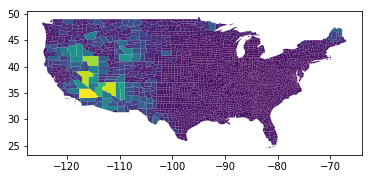

In [270]:
df.plot(column='ALAND')

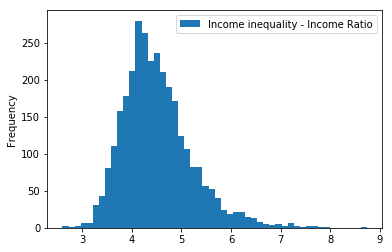

In [271]:
pd.DataFrame(df).plot(y='Income inequality - Income Ratio',kind='hist',bins=50)

## Cleaning Data

Many of the columns we are dealing with are missing data, which causes considerable problems for classification algorithms.  Before we begin, we'll make a copy of our data:

In [272]:
df_original = df.copy()

### Seeing the problem: identifying missing data

c:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


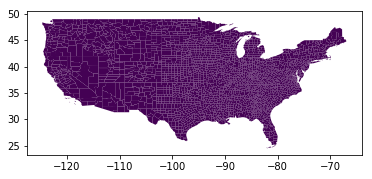

In [273]:
# When your plot doesn't show any values, this is often because of a mis-read of nans as a value.  The result
# is a plot that looks all one color:

df_original.plot(column='Teen births - Teen Birth Rate')

In [274]:
# You can also query for peculiar values.  These can vary!  Some missing values are denoted as negative numbers, others
# as missing values, others as nans.  Know your data, and look carefully!  It's often best to inspect via a text editor
# or a spreadsheet, if you can.

print('Any NaNs: ',np.any(np.isnan(df_original['Teen births - Teen Birth Rate'])))
print('Any negative numbers: ',np.any(df_original['Teen births - Teen Birth Rate'] < 0))
print('Any positive numbers out of bounds: ',np.any(df_original['Teen births - Teen Birth Rate'] > 100))
print('Any null values: ',np.any(df_original['Teen births - Teen Birth Rate'].isnull()))

Any NaNs:  True
Any negative numbers:  False
Any positive numbers out of bounds:  True
Any null values:  True


In [275]:
# Another nice trick is to find the sum of the missing values.  This gives you more information than any, but is a
# little less intuitive.  Knowing the scope of the problem can help you decide how you want to approach it.

print('Number of NaNs: ',np.sum(np.isnan(df_original['Teen births - Teen Birth Rate'])))
print('Number of null values: ',np.sum(df_original['Teen births - Teen Birth Rate'].isnull()))

Number of NaNs:  95
Number of null values:  95


#### Defining a mean by class

One simple approach (if a bit questionable) is to just fill missing values with means (or medians).  A more sophisticated way to do this would be to estimate means using local geography, though this is beyond the scope of this simple notebook.

In [276]:
# First, we generate a list of columns we'd like to fix.  We don't need to fix FIPS codes this way, for example.

cols_to_inspect = df.columns[11:].values
print(cols_to_inspect)

['Poor or fair health - % Fair/Poor' 'Low birthweight - % LBW'
 'Adult smoking - % Smokers' 'Adult obesity - % Obese'
 'Physical inactivity - % Physically Inactive'
 'Excessive drinking - % Excessive Drinking'
 'Alcohol-impaired driving deaths - % Alcohol-Impaired'
 'Sexually transmitted infections - Chlamydia Rate'
 'Teen births - Teen Birth Rate' 'Uninsured - % Uninsured'
 'Primary care physicians - PCP Rate'
 'High school graduation - Graduation Rate'
 'Some college - % Some College' 'Unemployment - % Unemployed'
 'Income inequality - Income Ratio' 'Violent crime - Violent Crime Rate'
 'Infant mortality - Infant Mortality Rate'
 'Median household income - Household Income' 'Homicides - Homicide Rate'
 'Demographics - Population' 'Demographics - % Non-Hispanic White'
 'Demographics - % Rural']


In [277]:
# We can iterate over each of these columns, calculate the mean, and then replace the value:

for this_column in cols_to_inspect:
    num_missing_values = np.sum(df_original[this_column].isnull())
    if num_missing_values > 0:
        print(this_column)
        print('Number of null values: ',num_missing_values,'of',len(df))    
        column_mean = np.nanmean(df[this_column])
        df[this_column] = df[this_column].fillna(column_mean)

Low birthweight - % LBW
Number of null values:  92 of 3108
Alcohol-impaired driving deaths - % Alcohol-Impaired
Number of null values:  17 of 3108
Sexually transmitted infections - Chlamydia Rate
Number of null values:  174 of 3108
Teen births - Teen Birth Rate
Number of null values:  95 of 3108
Primary care physicians - PCP Rate
Number of null values:  132 of 3108
High school graduation - Graduation Rate
Number of null values:  491 of 3108
Violent crime - Violent Crime Rate
Number of null values:  149 of 3108
Infant mortality - Infant Mortality Rate
Number of null values:  1779 of 3108
Homicides - Homicide Rate
Number of null values:  1890 of 3108


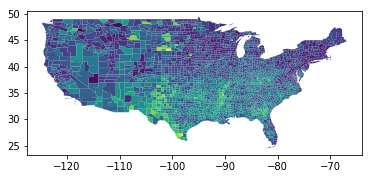

In [278]:
# And now we can see our values in the plot.  
# But keep in mind that some of these are interpolated / guessed / simple means!

df.plot(column='Teen births - Teen Birth Rate')

## Classification using k-means

We'll start by classifying our data on a single attribute, teen birth rate.  The code is quite simple!

[[23.5384495 ]
 [70.47971348]
 [44.96034783]]


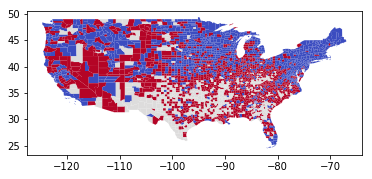

In [279]:
X = pd.DataFrame(df['Teen births - Teen Birth Rate'])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

print(kmeans.cluster_centers_)

vis_df = df.copy()
vis_df['teen_birth_rate_classes'] = kmeans.labels_
vis_df.plot(column='teen_birth_rate_classes',cmap='coolwarm')

And yet, this doesn't look right.  Why not?  This is because we're guessing <u>categories, not ranks</u>.  Each color is a distinct type, but they aren't in order.  Look at the list of cluster centers to confirm.

### Making quantitative categories into ranks

In [283]:
# We can use argsort to return the indices of the sorted values, and then use those as lookup values

new_values = np.argsort(kmeans.cluster_centers_[:,0])
print('old order: ',kmeans.labels_)
print('correct sorted order:',new_values)
print(new_values[kmeans.labels_])

old order:  [1 2 0 ... 0 2 0]
correct sorted order: [0 2 1]
[2 1 0 ... 0 1 0]


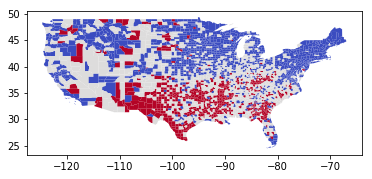

In [284]:
# Apply the correction:

new_values = np.argsort(kmeans.cluster_centers_[:,0])
vis_df['teen_birth_rate_classes'] = new_values[kmeans.labels_]
vis_df.plot(column='teen_birth_rate_classes',cmap='coolwarm')

## Two Americas

As an example, the above classification works OK, but that's a poor demonstration of the capabilities of k-means clustering.

A more powerful example is the ability to make simple classifications based on a lot of variables.  This time we'll classify the counties of the lower 48 into two types based on <u>all</u> the CHR data we have included in our analysis.  

In [285]:
two_americas = df.copy()

X = pd.DataFrame(df.iloc[:,11:])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
two_americas['which_america'] = kmeans.labels_

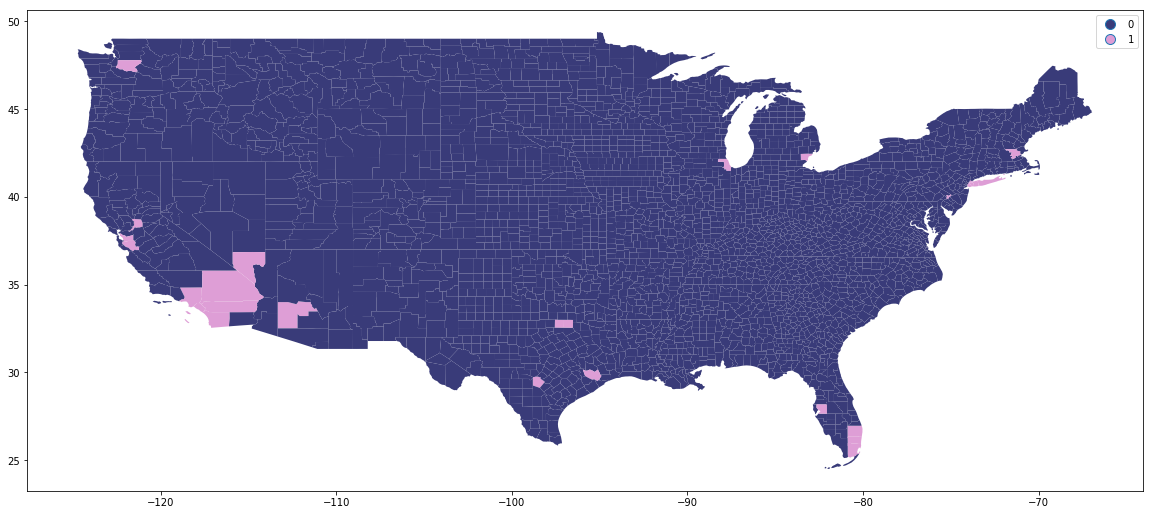

In [286]:
two_americas.plot(column='which_america',cmap='tab20b',figsize=[20,15],legend=True,categorical=True)

In [287]:
# What are these types like?  Let's investigate!

grp = two_americas.groupby('which_america')
grp.mean()

,ALAND,AWATER,Poor or fair health - % Fair/Poor,Low birthweight - % LBW,Adult smoking - % Smokers,Adult obesity - % Obese,Physical inactivity - % Physically Inactive,Excessive drinking - % Excessive Drinking,Alcohol-impaired driving deaths - % Alcohol-Impaired,Sexually transmitted infections - Chlamydia Rate,...,Some college - % Some College,Unemployment - % Unemployed,Income inequality - Income Ratio,Violent crime - Violent Crime Rate,Infant mortality - Infant Mortality Rate,Median household income - Household Income,Homicides - Homicide Rate,Demographics - Population,Demographics - % Non-Hispanic White,Demographics - % Rural
which_america,,,,,,,,,,,,,,,,,,,,,
0,2.424075e+09,1.342444e+08,16.935011,8.193766,18.400162,31.026307,27.469536,16.516012,31.273255,343.921235,...,56.180240,6.231819,4.508469,245.635285,7.251576,46859.006496,6.301315,7.907769e+04,77.762860,59.079841
1,6.541659e+09,5.211613e+08,16.986207,8.131453,14.365517,24.220690,21.213793,17.879310,27.615160,528.688518,...,63.970601,6.465328,5.161255,516.841363,5.735207,60180.793103,6.582759,2.524847e+06,42.060321,1.485713


In [260]:
two_americas.columns.values

array(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'LSAD', 'ALAND', 'AWATER', 'geometry', 'FIPS',
       'Poor or fair health - % Fair/Poor', 'Low birthweight - % LBW',
       'Adult smoking - % Smokers', 'Adult obesity - % Obese',
       'Physical inactivity - % Physically Inactive',
       'Excessive drinking - % Excessive Drinking',
       'Alcohol-impaired driving deaths - % Alcohol-Impaired',
       'Sexually transmitted infections - Chlamydia Rate',
       'Teen births - Teen Birth Rate', 'Uninsured - % Uninsured',
       'Primary care physicians - PCP Rate',
       'High school graduation - Graduation Rate',
       'Some college - % Some College', 'Unemployment - % Unemployed',
       'Income inequality - Income Ratio',
       'Violent crime - Violent Crime Rate',
       'Infant mortality - Infant Mortality Rate',
       'Median household income - Household Income',
       'Homicides - Homicide Rate', 'Demographics - Population',
       'Demographics -

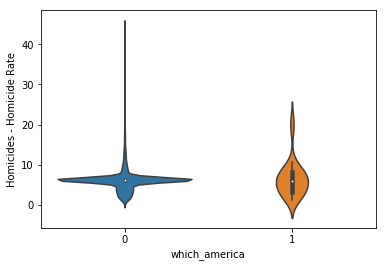

In [261]:
_ = seaborn.violinplot(data=two_americas,x='which_america',y='Homicides - Homicide Rate')

## Build your own Americas

,ALAND,AWATER,Poor or fair health - % Fair/Poor,Low birthweight - % LBW,Adult smoking - % Smokers,Adult obesity - % Obese,Physical inactivity - % Physically Inactive,Excessive drinking - % Excessive Drinking,Alcohol-impaired driving deaths - % Alcohol-Impaired,Sexually transmitted infections - Chlamydia Rate,...,Some college - % Some College,Unemployment - % Unemployed,Income inequality - Income Ratio,Violent crime - Violent Crime Rate,Infant mortality - Infant Mortality Rate,Median household income - Household Income,Homicides - Homicide Rate,Demographics - Population,Demographics - % Non-Hispanic White,Demographics - % Rural
which_america,,,,,,,,,,,,,,,,,,,,,
0,2.377735e+09,1.103065e+08,17.838834,8.409657,18.919238,32.026547,28.846099,15.968924,31.179434,342.532281,...,53.097955,6.456344,4.501298,239.144203,7.382530,44992.999552,6.513034,56630.952018,76.903953,65.596606
1,2.677775e+09,2.078230e+08,14.641116,7.643373,16.948519,28.261048,23.766629,17.950569,31.390720,353.551778,...,64.266135,5.669268,4.548242,271.079576,6.868885,52038.422551,5.772873,216872.141230,78.765126,40.625839


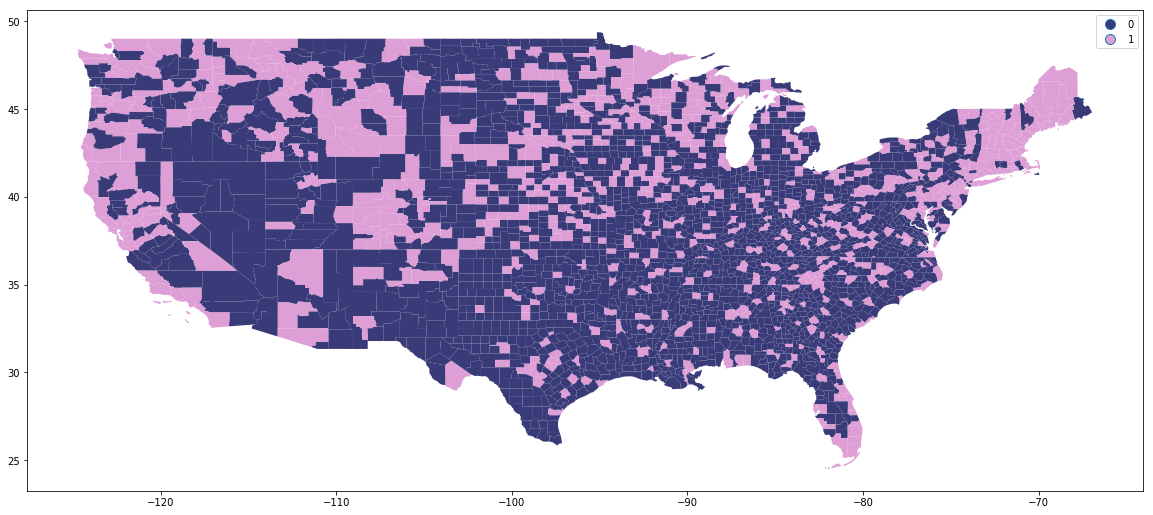

In [290]:
my_americas = df.copy()

cols = ['Teen births - Teen Birth Rate', 'Uninsured - % Uninsured',
       'Primary care physicians - PCP Rate',
       'High school graduation - Graduation Rate']

X = pd.DataFrame(df[cols])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
my_americas['which_america'] = kmeans.labels_
my_americas.plot(column='which_america',cmap='tab20b',figsize=[20,15],legend=True,categorical=True)

grp = my_americas.groupby('which_america')
grp.mean()